[*********************100%***********************]  1 of 1 completed
C:\Users\mabdu\PycharmProjects\pythonProject\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 91ms/step - loss: 0.0388 - val_loss: 0.0017
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 0.0015 - val_loss: 0.0019
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 0.0016 - val_loss: 0.0020
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 0.0013 - val_loss: 0.0019
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 0.0012 - val_loss: 0.0022
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 0.0012 - val_loss: 0.0026
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 9/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 10/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 0.0012 - val_loss: 0.0020
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step


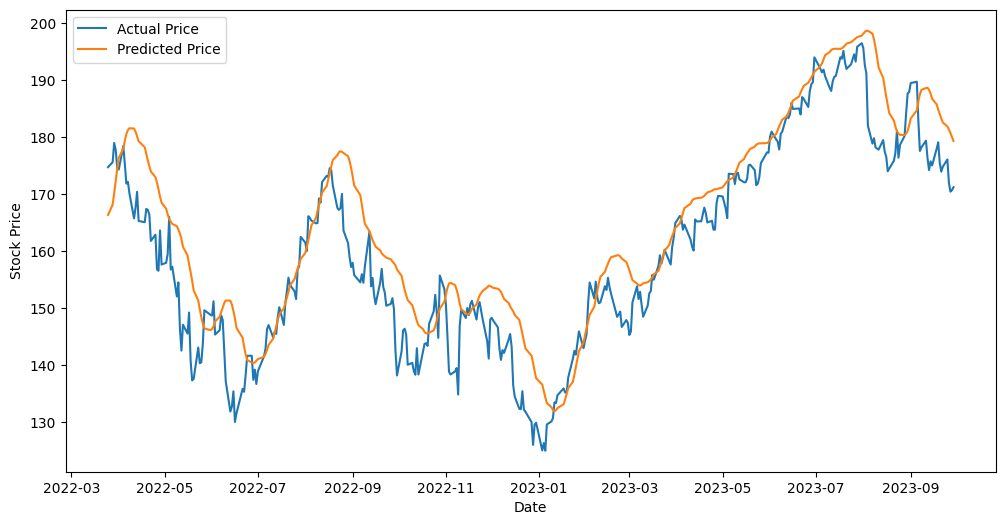

In [2]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Step 1: Fetch Stock Data
ticker = 'AAPL'  # You can change this to any company, e.g., TSLA for Tesla
stock_data = yf.download(ticker, start='2015-01-01', end='2023-10-01')

# Step 2: Data Preprocessing
# Use only the 'Close' price for prediction
data = stock_data[['Close']].values

# Scale the data to a range of 0-1 for better LSTM performance
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split into training and testing sets (80% train, 20% test)
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# Create sequences for LSTM input
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Define sequence length
sequence_length = 60

# Create train and test sequences
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Step 3: Build the LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Predict the next price

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 4: Train the Model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Step 5: Make Predictions
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)  # Convert back to original scale
y_test_scaled = scaler.inverse_transform(y_test)  # Convert y_test back to original scale

# Step 6: Plot the Results
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index[train_size + sequence_length:], y_test_scaled, label='Actual Price')
plt.plot(stock_data.index[train_size + sequence_length:], y_pred, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
